In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy.stats import poisson, norm, chisquare

Here we are figuring out our operating voltage.  Notice the count starts to blow up around 950.

Our operating voltage is 780

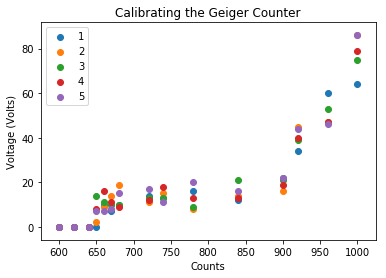

In [2]:
df = pd.read_excel('geiger_calibration.xlsx')
X = df.values
for i in range(1, len(X[0])):
    plt.scatter(X[:, 0], X[:,i])
    
plt.title('Calibrating the Geiger Counter')
plt.xlabel('Counts')
plt.ylabel('Voltage (Volts)')
plt.legend([1,2,3,4,5])
plt.show()

In [21]:
df1 = pd.read_excel('0.1s_interval_geiger.xlsx')
counts = df1.values
counts = np.ndarray.flatten(counts)
y = np.bincount(counts)
x = np.nonzero(y)[0]
y = y/sum(counts)

In [22]:
mean = np.mean(counts)
std = np.std(counts)
print(mean, std**2)

2.0 1.2244897959183676


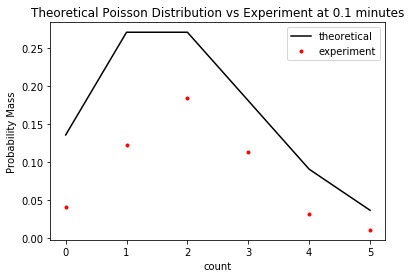

In [23]:
inp = np.arange(poisson.ppf(0.01, mean), poisson.ppf(0.99, mean))
plt.plot(inp, poisson.pmf(inp, mean), '-k')
plt.plot(x,y, '.r')
plt.title('Theoretical Poisson Distribution vs Experiment at 0.1 minutes')
plt.ylabel('Probability Mass')
plt.xlabel('count')
plt.legend(['theoretical', 'experiment'])
plt.show()

In [6]:
expected_values = poisson.pmf(x, mean)
chi_test = chisquare(y,expected_values)
chi2, p = chi_test
print(chi2, p)

0.25887184377023653 0.998345851183108


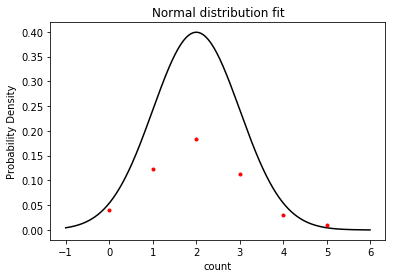

In [24]:
ins = np.arange(-1, 6, 0.01)
plt.plot(ins, norm.pdf(ins, loc=mean), 'k-')
plt.plot(x, y, '.r')
plt.xlabel('count')
plt.ylabel('Probability Density')
plt.title('Normal distribution fit')
plt.show()